['age', 'prescript', 'astigmatic', 'tearRate']
['age', 'prescript', 'astigmatic']
['age', 'prescript']
['age']
['age', 'prescript']
['prescript']


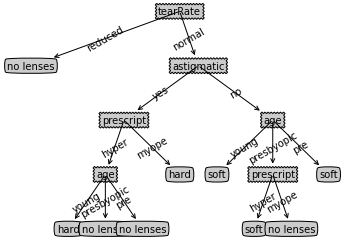

In [2]:
# -*- coding: utf-8 -*-
"""
用途：教学
202204011  sqx
"""
"""

用字典存储决策树结构：
{'有自己的房子':{0:{'有工作':{0:'no', 1:'yes'}}, 1:'yes'}}
年龄：0代表青年，1代表中年，2代表老年
有工作：0代表否，1代表是
有自己的房子：0代表否，1代表是
信贷情况：0代表一般，1代表好，2代表非常好
类别（是否给贷款）：no代表否，yes代表是

pickle包可以将决策树保存下来，方便下次直接调用

"""

"""
函数说明：创建测试数据集

Parameters:
    None

Returns:
    dataSet - 数据集
    labels - 分类属性


"""




from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from math import log
import operator
import pickle
import copy
def createDataSet():
    # 数据集
    dataSet = [[0, 0, 0, 0, 'no'],
               [0, 0, 0, 1, 'no'],
               [0, 1, 0, 1, 'yes'],
               [0, 1, 1, 0, 'yes'],
               [0, 0, 0, 0, 'no'],
               [1, 0, 0, 0, 'no'],
               [1, 0, 0, 1, 'no'],
               [1, 1, 1, 1, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [2, 0, 1, 2, 'yes'],
               [2, 0, 1, 1, 'yes'],
               [2, 1, 0, 1, 'yes'],
               [2, 1, 0, 2, 'yes'],
               [2, 0, 0, 0, 'no']]
    # 分类属性
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']
    # 返回数据集和分类属性
    return dataSet, labels


"""
函数说明：计算给定数据集的经验熵（香农熵）
        Ent（D） = -SUM（kp*Log2（kp））

Parameters:
    dataSet - 数据集

Returns:
    shannonEnt - 经验熵（香农熵）


"""


def calcShannonEnt(dataSet):
    # 返回数据集的行数
    numEntires = len(dataSet)
    # 保存每个标签（Label）出现次数的“字典”
    labelCounts = {}
    # 对每组特征向量进行统计
    for featVec in dataSet:
        # 提取标签（Label）信息
        currentLabel = featVec[-1]
        # 如果标签（Label）没有放入统计次数的字典，添加进去
        if currentLabel not in labelCounts.keys():
            # 创建一个新的键值对，键为currentLabel值为0
            labelCounts[currentLabel] = 0
        # Label计数
        labelCounts[currentLabel] += 1
    # 经验熵（香农熵）
    shannonEnt = 0.0
    # 计算香农熵
    for key in labelCounts:
        # 选择该标签（Label）的概率
        prob = float(labelCounts[key]) / numEntires
        # 利用公式计算
        #######################  填空-sqx  1 #############################
        # 填空-sqx  计算经验熵  shannonEnt
        shannonEnt -= prob*log(prob, 2)

    # 返回经验熵（香农熵）
    return shannonEnt


"""
函数说明：按照给定特征划分数据集

Parameters:
    dataSet - 待划分的数据集
    axis - 划分数据集的特征
    values - 需要返回的特征的值

Returns:
    None

"""


def splitDataSet(dataSet, axis, value):
    # 创建返回的数据集列表
    retDataSet = []
    # 遍历数据集的每一行
    for featVec in dataSet:
        if featVec[axis] == value:
            # 去掉axis特征
            reducedFeatVec = featVec[:axis]
            # 将符合条件的添加到返回的数据集
            # extend() 函数用于在列表末尾一次性追加另一个序列中的多个值（用新列表扩展原来的列表）。
            reducedFeatVec.extend(featVec[axis+1:])
            # 列表中嵌套列表
            retDataSet.append(reducedFeatVec)
    # 返回划分后的数据集
    return retDataSet


"""
函数说明：选择最优特征
        Gain(D,g) = Ent(D) - SUM(|Dv|/|D|)*Ent(Dv)

Parameters:
    dataSet - 数据集

Returns:
    bestFeature - 信息增益最大的（最优）特征的索引值


"""


def chooseBestFeatureToSplit(dataSet):
    # 特征数量
    numFeatures = len(dataSet[0]) - 1
    # 计算数据集的香农熵
    baseEntropy = calcShannonEnt(dataSet)
    # 信息增益
    bestInfoGain = 0.0
    # 最优特征的索引值
    bestFeature = -1
    # 遍历所有特征
    for i in range(numFeatures):
        # 获取dataSet的第i个所有特征存在featList这个列表中（列表生成式）
        featList = [example[i] for example in dataSet]
        # 创建set集合{}，元素不可重复，重复的元素均被删掉
        # 从列表中创建集合是python语言得到列表中唯一元素值得最快方法
        uniqueVals = set(featList)
        # 经验条件熵
        newEntropy = 0.0
        # 计算信息增益
        for value in uniqueVals:
            # subDataSet划分后的子集
            subDataSet = splitDataSet(dataSet, i, value)
            # 计算子集的概率
            prob = len(subDataSet) / float(len(dataSet))
            #######################  填空-sqx  2 #############################
            # 填空-sqx
            # 根据公式计算经验条件熵  newEntropy
            newEntropy += prob*calcShannonEnt(subDataSet)

        #######################  填空-sqx  3 #############################
        # 填空-sqx
        # 计算信息增益  infoGain
        infoGain = baseEntropy-newEntropy

        # 打印每个特征的信息增益
        #print("第%d个特征的增益为%.3f" % (i, infoGain))
        # 计算信息增益
        if(infoGain > bestInfoGain):
            # 更新信息增益，找到最大的信息增益
            bestInfoGain = infoGain
            # 记录信息增益最大的特征的索引值
            bestFeature = i
    # 返回信息增益最大的特征的索引值
    return bestFeature


"""
函数说明：统计classList中出现次数最多的元素（类标签）
        服务于递归第两个终止条件

Parameters:
    classList - 类标签列表
    
Returns:
    sortedClassCount[0][0] - 出现次数最多的元素（类标签）
    

"""


def majorityCnt(classList):
    classCount = {}
    # 统计classList中每个元素出现的次数
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 根据字典的值降序排序
    # operator.itemgetter(1)获取对象的第1列的值
    sortedClassCount = sorted(
        classCount.items(), key=operator.itemgetter(1), reverse=True)
    # 返回classList中出现次数最多的元素
    return sortedClassCount[0][0]


"""
函数说明：创建决策树（ID3算法）
        递归有两个终止条件：1、所有的类标签完全相同，直接返回类标签
                        2、用完所有标签但是得不到唯一类别的分组，即特征不够用，挑选出现数量最多的类别作为返回

Parameters:
    dataSet - 训练数据集
    labels - 分类属性标签
    featLabels - 存储选择的最优特征标签
    
Returns:
    myTree - 决策树
    

"""


def createTree(dataSet, labels, featLabels):
    # 取分类标签（是否放贷：yes or no）
    classList = [example[-1] for example in dataSet]
    # 如果类别完全相同则停止继续划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 遍历完所有特征时返回出现次数最多的类标签
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    # 选择最优特征
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 最优特征的标签
    bestFeatLabel = labels[bestFeat]
    # print(labels)
    featLabels.append(bestFeatLabel)
    # 根据最优特征的标签生成树
    myTree = {bestFeatLabel: {}}
    # 删除已经使用的特征标签
    del(labels[bestFeat])
    # 得到训练集中所有最优解特征的属性值
    featValues = [example[bestFeat] for example in dataSet]
    # 去掉重复的属性值
    uniqueVals = set(featValues)
    # 遍历特征，创建决策树
    for value in uniqueVals:
        nowLabels = copy.copy(labels)
        myTree[bestFeatLabel][value] = createTree(
            splitDataSet(dataSet, bestFeat, value), nowLabels, featLabels)
    return myTree


"""
函数说明：获取决策树叶子结点的数目

Parameters:
    myTree - 决策树
    
Returns:
    numLeafs - 决策树的叶子结点的数目
    

"""


def getNumLeafs(myTree):
    # 初始化叶子
    numLeafs = 0
    # python3中myTree.keys()返回的是dict_keys,不是list,所以不能用
    # myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    # next() 返回迭代器的下一个项目 next(iterator[, default])
    firstStr = next(iter(myTree))
    # 获取下一组字典
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        # 测试该结点是否为字典，如果不是字典，代表此节点为叶子结点
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


"""
函数说明：获取决策树的层数

Parameters:
    myTree - 决策树
    
Returns:
    maxDepth - 决策树的层数
    

"""


def getTreeDepth(myTree):
    # 初始化决策树深度
    maxDepth = 0
    # python3中myTree.keys()返回的是dict_keys,不是list,所以不能用
    # myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    # next() 返回迭代器的下一个项目 next(iterator[, default])
    firstStr = next(iter(myTree))
    # 获取下一个字典
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        # 测试该结点是否为字典，如果不是字典，代表此节点为叶子结点
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        # 更新最深层数
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    # 返回决策树的层数
    return maxDepth


"""
函数说明：绘制结点

Parameters:
    nodeTxt - 结点名
    centerPt - 文本位置
    parentPt - 标注的箭头位置
    nodeType - 结点格式
    
Returns:
    None

"""


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    # 定义箭头格式
    arrow_args = dict(arrowstyle="<-")
    # 设置中文字体
    font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc", size=14)
    # 绘制结点createPlot.ax1创建绘图区
    # annotate是关于一个数据点的文本
    # nodeTxt为要显示的文本，centerPt为文本的中心点，箭头所在的点，parentPt为指向文本的点
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va='center', ha='center', bbox=nodeType,
                            arrowprops=arrow_args, FontProperties=font)


"""
函数说明：标注有向边属性值

Parameters:
    cntrPt、parentPt - 用于计算标注位置
    txtString - 标注内容
    
Returns:
    None
    

"""


def plotMidText(cntrPt, parentPt, txtString):
    # 计算标注位置（箭头起始位置的中点处）
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center",
                        ha="center", rotation=30)


"""
函数说明：绘制决策树

Parameters:
    myTree - 决策树（字典）
    parentPt - 标注的内容
    nodeTxt - 结点名
    
Returns:
    None
    

"""


def plotTree(myTree, parentPt, nodeTxt):
    # 设置结点格式boxstyle为文本框的类型，sawtooth是锯齿形，fc是边框线粗细
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")
    # 设置叶结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")
    # 获取决策树叶结点数目，决定了树的宽度
    numLeafs = getNumLeafs(myTree)
    # 获取决策树层数
    depth = getTreeDepth(myTree)
    # 下个字典
    firstStr = next(iter(myTree))
    # 中心位置
    cntrPt = (plotTree.xoff + (1.0 + float(numLeafs)) /
              2.0 / plotTree.totalW, plotTree.yoff)
    # 标注有向边属性值
    plotMidText(cntrPt, parentPt, nodeTxt)
    # 绘制结点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 下一个字典，也就是继续绘制结点
    secondDict = myTree[firstStr]
    # y偏移
    plotTree.yoff = plotTree.yoff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        # 测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
        if type(secondDict[key]).__name__ == 'dict':
            # 不是叶结点，递归调用继续绘制
            plotTree(secondDict[key], cntrPt, str(key))
        # 如果是叶结点，绘制叶结点，并标注有向边属性值
        else:
            plotTree.xoff = plotTree.xoff + 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.xoff,
                                       plotTree.yoff), cntrPt, leafNode)
            plotMidText((plotTree.xoff, plotTree.yoff), cntrPt, str(key))
    plotTree.yoff = plotTree.yoff + 1.0 / plotTree.totalD


"""
函数说明：创建绘图面板

Parameters:
    inTree - 决策树（字典）
    
Returns:
    None

"""


def createPlot(inTree):
    # 创建fig
    fig = plt.figure(1, facecolor="white")
    # 清空fig
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    # 去掉x、y轴
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    # 获取决策树叶结点数目
    plotTree.totalW = float(getNumLeafs(inTree))
    # 获取决策树层数
    plotTree.totalD = float(getTreeDepth(inTree))
    # x偏移
    plotTree.xoff = -0.5 / plotTree.totalW
    plotTree.yoff = 1.0
    # 绘制决策树
    plotTree(inTree, (0.5, 1.0), '')
    # 显示绘制结果
    plt.show()


"""
函数说明：使用决策树分类

Parameters:
    inputTree - 已经生成的决策树
    featLabels - 存储选择的最优特征标签
    testVec - 测试数据列表，顺序对应最优特征标签
    
Returns:
    classLabel - 分类结果
    

"""


def classify(inputTree, featLabels, testVec):
    # 获取决策树结点
    firstStr = next(iter(inputTree))
    # 下一个字典
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            # 如果是分支结点，则在用该子树secondDict[key]进行预测
            if type(secondDict[key]).__name__ == 'dict':
                #######################  填空-sqx  4 #############################
                # 填空-sqx
                classLabel = classify(secondDict[key], featLabels, testVec)

            else:
                classLabel = secondDict[key]
    return classLabel


"""
函数说明：存储决策树

Parameters:
    inputTree - 已经生成的决策树
    filename - 决策树的存储文件名
    
Returns:
    None
    

"""


def storeTree(inputTree, filename):
    with open(filename, 'wb') as fw:
        pickle.dump(inputTree, fw)


"""
函数说明：读取决策树

Parameters:
    filename - 决策树的存储文件名
    
Returns:
    pickle.load(fr) - 决策树字典
    

"""


def grabTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)


"""
函数说明：main函数

Parameters:
    None
    
Returns:
    None
    

"""


def main():
    with open('lenses.txt') as fr:
        lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
    myTree = createTree(lenses, lensesLabels, [])
    createPlot(myTree)
    """ dataSet, features = createDataSet()
    featLabels = []
    myTree = createTree(dataSet, features, featLabels)
    # storeTree(myTree, 'classifierStorage.txt')
    # myTree = grabTree('classifierStorage.txt')
    # print(myTree)
    # 测试数据
    testVec = [0, 0, 1, 0]
    result = classify(myTree, featLabels, testVec)
    if result == 'yes':
        print('放贷')
    if result == 'no':
        print('不放贷')
    print(myTree)
    createPlot(myTree)
    # print(dataSet)
    # print(calcShannonEnt(dataSet))
    print("最优特征索引值:" + str(chooseBestFeatureToSplit(dataSet))) """


if __name__ == '__main__':
    main()
